Import libraries and dataset

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sales_data = pd.read_csv('stores_sales_forecasting.csv',encoding='latin1')
sales_data.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [125]:
sales_data.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [126]:
sales_data['date'] = pd.to_datetime(sales_data['Order Date'])
sales_data.set_index('date',inplace=True)
sales_data.sort_index()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
date,,,,,,,,,,,,,,,,,,,,,
2014-01-06,7475,CA-2014-167199,1/6/2014,1/10/2014,Standard Class,ME-17320,Maria Etezadi,Home Office,United States,Henderson,...,42420,South,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,2573.820,9,0.0,746.4078
2014-01-07,7661,CA-2014-105417,1/7/2014,1/12/2014,Standard Class,VS-21820,Vivek Sundaresam,Consumer,United States,Huntsville,...,77340,Central,FUR-FU-10004864,Furniture,Furnishings,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",76.728,3,0.6,-53.7096
2014-01-10,867,CA-2014-149020,1/10/2014,1/15/2014,Standard Class,AJ-10780,Anthony Jacobs,Corporate,United States,Springfield,...,22153,South,FUR-FU-10000965,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Ridgewood Wall ...",51.940,1,0.0,21.2954
2014-01-11,717,CA-2014-130092,1/11/2014,1/14/2014,First Class,SV-20365,Seth Vernon,Consumer,United States,Dover,...,19901,East,FUR-FU-10000010,Furniture,Furnishings,"DAX Value U-Channel Document Frames, Easel Back",9.940,2,0.0,3.0814
2014-01-13,2979,CA-2014-109232,1/13/2014,1/16/2014,Second Class,ND-18370,Natalie DeCherney,Consumer,United States,Mount Pleasant,...,29464,South,FUR-CH-10000422,Furniture,Chairs,Global Highback Leather Tilter in Burgundy,545.940,6,0.0,87.3504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-29,7637,US-2017-158526,12/29/2017,1/1/2018,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Louisville,...,40214,South,FUR-CH-10001270,Furniture,Chairs,Harbour Creations Steel Folding Chair,258.750,3,0.0,77.6250
2017-12-29,7633,US-2017-158526,12/29/2017,1/1/2018,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Louisville,...,40214,South,FUR-CH-10002602,Furniture,Chairs,DMI Arturo Collection Mission-style Design Woo...,1207.840,8,0.0,314.0384
2017-12-29,5132,CA-2017-146626,12/29/2017,1/5/2018,Standard Class,BP-11185,Ben Peterman,Corporate,United States,Anaheim,...,92804,West,FUR-FU-10002501,Furniture,Furnishings,Nu-Dell Executive Frame,101.120,8,0.0,37.4144


In [127]:
sales_data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [128]:
daily_sales = sales_data.groupby('date')['Sales'].sum()
daily_sales.head()

date
2014-01-06    2573.820
2014-01-07      76.728
2014-01-10      51.940
2014-01-11       9.940
2014-01-13     879.939
Name: Sales, dtype: float64

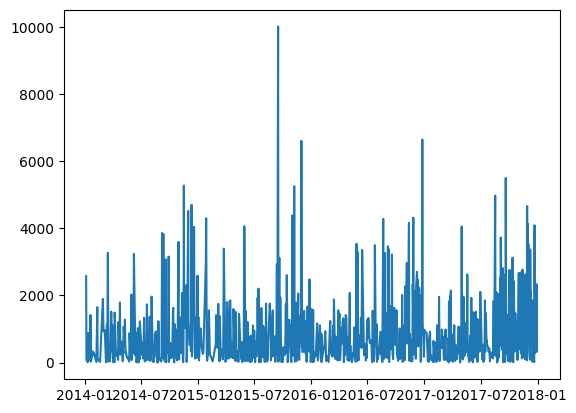

In [129]:
plt.plot(daily_sales)

Check trend,seasonality and noise using decomposition

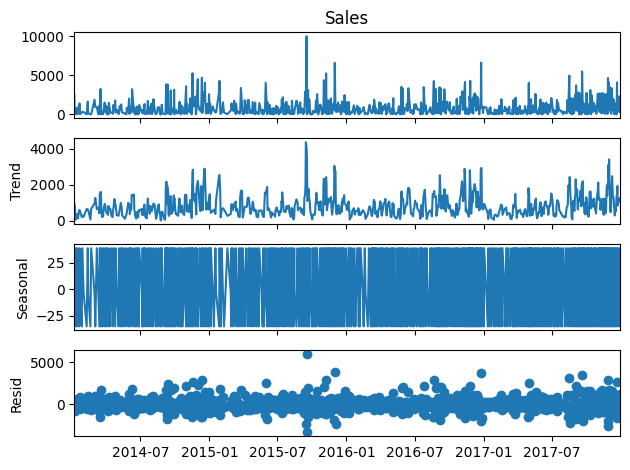

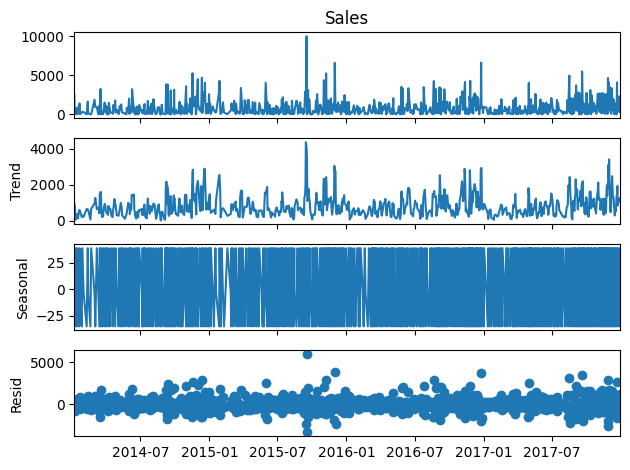

In [130]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(daily_sales,period=3)
decomp.plot()

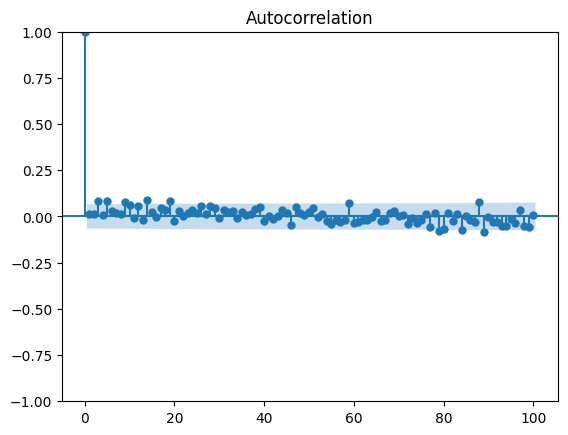

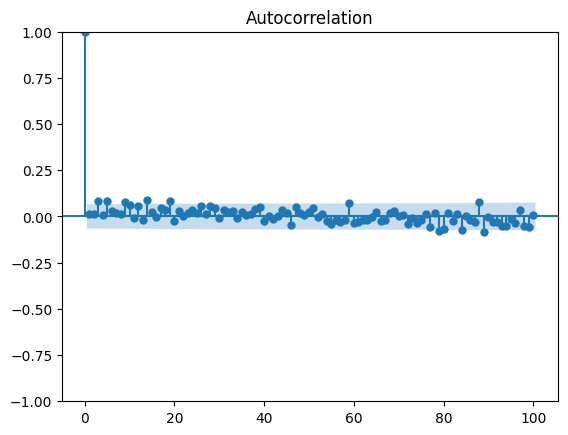

In [131]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(daily_sales,lags=100)

As per the ACF plot no clear seasonality is present in this dataset.
Check for outlier and cap outliers 

In [132]:
outlier = daily_sales[daily_sales.values>5000]#not a properway..we can use residual value for this
outlier.count()

np.int64(6)

In [133]:
#daily_sales = daily_sales[daily_sales<=5000] ***dont remove datapoints from time series data , cap them
daily_sales

date
2014-01-06    2573.8200
2014-01-07      76.7280
2014-01-10      51.9400
2014-01-11       9.9400
2014-01-13     879.9390
                ...    
2017-12-24    1393.4940
2017-12-25     832.4540
2017-12-28     551.2568
2017-12-29    2330.7180
2017-12-30     323.1360
Name: Sales, Length: 889, dtype: float64

In [134]:
residual = decomp.resid.dropna()
residual

date
2014-01-07    -789.090275
2014-01-10     -33.069099
2014-01-11    -300.204292
2014-01-13     597.670391
2014-01-14    -333.180766
                 ...     
2017-12-23   -1603.562942
2017-12-24     518.666901
2017-12-25     -89.485559
2017-12-28    -651.875075
2017-12-29    1223.541301
Name: resid, Length: 887, dtype: float64

In [135]:
threshold = 3* residual.std()
outliers = residual[abs(residual)>threshold]
outliers.count()

np.int64(15)

In [136]:
mean = residual.mean()
std = residual.std()
upper_cap = mean + 3 * std
lower_cap = mean - 3 * std
residual_capped = residual.clip(lower=lower_cap,upper = upper_cap)


In [137]:
clean_sales = decomp.trend+decomp.seasonal+residual_capped
clean_sales # has Nans : Trend cannot be calculated for the first & last period/2 values. but its ok

date
2014-01-06          NaN
2014-01-07      76.7280
2014-01-10      51.9400
2014-01-11       9.9400
2014-01-13     879.9390
                ...    
2017-12-24    1393.4940
2017-12-25     832.4540
2017-12-28     551.2568
2017-12-29    2330.7180
2017-12-30          NaN
Length: 889, dtype: float64

In [138]:
valid_idx = decomp.resid.dropna().index
clean_sale = (
    decomp.trend.loc[valid_idx] +
    decomp.seasonal.loc[valid_idx] +
    residual_capped
)
clean_sale

date
2014-01-07      76.7280
2014-01-10      51.9400
2014-01-11       9.9400
2014-01-13     879.9390
2014-01-14      61.9600
                ...    
2017-12-23     282.1140
2017-12-24    1393.4940
2017-12-25     832.4540
2017-12-28     551.2568
2017-12-29    2330.7180
Length: 887, dtype: float64

Check for stationarity

In [139]:
from statsmodels.tsa.stattools import adfuller
adfuller_result = adfuller(clean_sale.dropna())
adfuller_result[1]


np.float64(2.326612645611995e-07)

In [140]:
#p value  < 0.05, no need to do differencing


Build Model using ARIMA : no seasonality , so we can go with ARIMA

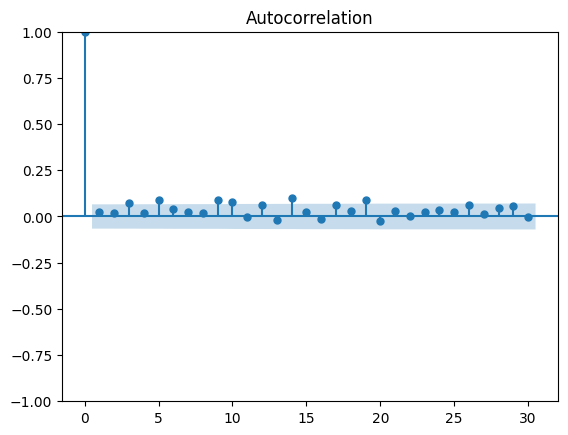

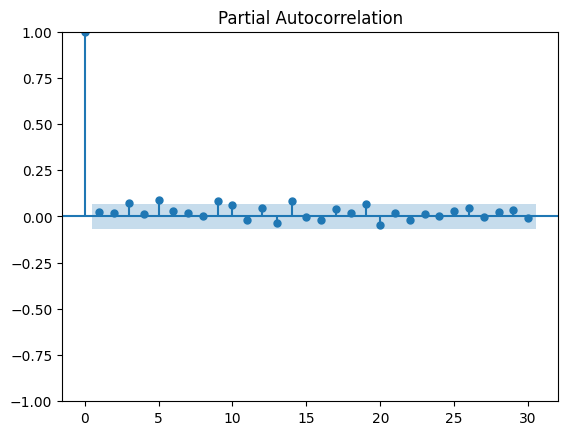

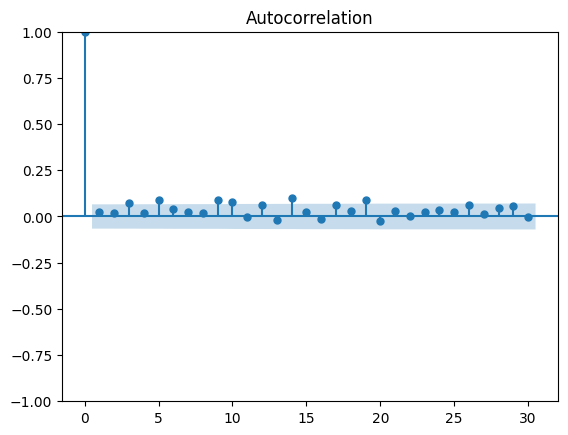

In [141]:
#finding p and q value using ACF,PACF plots
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_pacf(clean_sale)
plot_acf(clean_sale)

In [142]:
from statsmodels.tsa.arima.model import ARIMA
#from ACF(q), PACF(p) , the value for p and q is 1
model = ARIMA(clean_sale,order=(1,0,1))
model_fit = model.fit()
print(model_fit.summary())

c:\Users\sujin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sujin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\sujin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  887
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -7333.033
Date:                Thu, 01 Jan 2026   AIC                          14674.067
Time:                        21:24:01   BIC                          14693.218
Sample:                             0   HQIC                         14681.388
                                - 887                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        823.2578    109.802      7.498      0.000     608.051    1038.465
ar.L1          0.9733      0.021     45.760      0.000       0.932       1.015
ma.L1         -0.9401      0.031    -30.069      0.0

In [143]:
#Just to check how AIC,BIC value change with p,q values : Lower AIC,BIC values should be taken
from statsmodels.tsa.arima.model import ARIMA
#from ACF(q), PACF(p) , the value for p and q is 1
model_1 = ARIMA(clean_sale,order=(2,0,2))
model_1_fit = model.fit()
print(model_1_fit.summary())

c:\Users\sujin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sujin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\sujin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  887
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -7333.033
Date:                Thu, 01 Jan 2026   AIC                          14674.067
Time:                        21:24:01   BIC                          14693.218
Sample:                             0   HQIC                         14681.388
                                - 887                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        823.2578    109.802      7.498      0.000     608.051    1038.465
ar.L1          0.9733      0.021     45.760      0.000       0.932       1.015
ma.L1         -0.9401      0.031    -30.069      0.0

In [154]:
forecast = model_fit.forecast(steps=60)
forecast

c:\Users\sujin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\sujin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


887    1058.701711
888    1052.419258
889    1046.304442
890    1040.352790
891    1034.559949
892    1028.921681
893    1023.433861
894    1018.092475
895    1012.893615
896    1007.833479
897    1002.908365
898     998.114670
899     993.448887
900     988.907603
901     984.487496
902     980.185333
903     975.997967
904     971.922333
905     967.955452
906     964.094421
907     960.336415
908     956.678686
909     953.118557
910     949.653425
911     946.280755
912     942.998079
913     939.802996
914     936.693169
915     933.666323
916     930.720243
917     927.852775
918     925.061821
919     922.345339
920     919.701342
921     917.127896
922     914.623119
923     912.185178
924     909.812289
925     907.502717
926     905.254772
927     903.066811
928     900.937231
929     898.864476
930     896.847030
931     894.883415
932     892.972197
933     891.111977
934     889.301393
935     887.539123
936     885.823875
937     884.154397
938     882.529466
939     880.

In [155]:
import pandas as pd
last_date = clean_sale.index[-1]
future_dates = pd.date_range(start=last_date+pd.Timedelta(days=1),
                             periods=len(forecast),
                             freq='D')


In [156]:

forecast = pd.Series(forecast.values, index=future_dates)


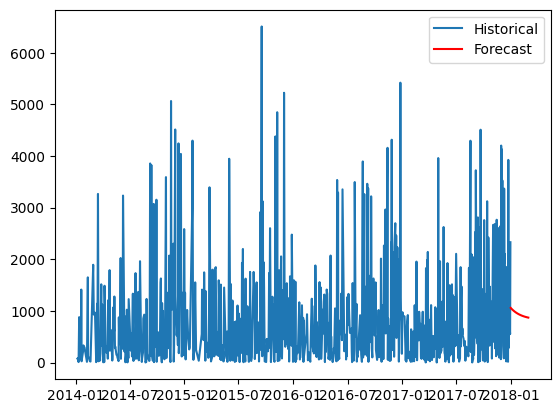

In [157]:
#forecast = model_fit.forecast(steps=30)


plt.plot(clean_sale, label='Historical')
plt.plot(forecast, label='Forecast', color='red')
plt.legend()
plt.show()
